##Downloading the Data

In [ ]:
# ! chmod 600 kaggle.json && (ls ~/.kaggle 2>/dev/null || mkdir ~/.kaggle) &&   mv kaggle.json ~/.kaggle/ && echo 'Done'
# ! kaggle datasets download -d praveengovi/emotions-dataset-for-nlp
# ! unzip /content/emotions-dataset-for-nlp.zip

##Preprocessing

In [ ]:
import pandas as pd

train = pd.read_csv('/content/train.txt', header=None, sep=';', names=['Comment', 'Emotion'], encoding='utf-8')
test = pd.read_csv('/content/test.txt', header=None, sep=';', names=['Comment', 'Emotion'], encoding='utf-8')
val = pd.read_csv('/content/val.txt', header=None, sep=';', names=['Comment', 'Emotion'], encoding='utf-8')

In [ ]:
!pip install fasttext contractions

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import nltk
import string
import fasttext
import contractions
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
train.head()

Comment  Emotion
0                            i didnt feel humiliated  sadness
1  i can go from feeling so hopeless to so damned...  sadness
2   im grabbing a minute to post i feel greedy wrong    anger
3  i am ever feeling nostalgic about the fireplac...     love
4                               i am feeling grouchy    anger

> expanding contractions

In [ ]:
train['no_contract'] = train['Comment'].apply(lambda x: [contractions.fix(word) for word in x.split()])
train.head()

Comment  Emotion  \
0                            i didnt feel humiliated  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

                                         no_contract  
0                     [i, did not, feel, humiliated]  
1  [i, can, go, from, feeling, so, hopeless, to, ...  
2  [i am, grabbing, a, minute, to, post, i, feel,...  
3  [i, am, ever, feeling, nostalgic, about, the, ...  
4                          [i, am, feeling, grouchy]

In [ ]:
train['comment_str'] = [' '.join(map(str, l)) for l in train['no_contract']]
train.head()

Comment  Emotion  \
0                            i didnt feel humiliated  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

                                         no_contract  \
0                     [i, did not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i am, grabbing, a, minute, to, post, i, feel,...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                         comment_str  
0                          i did not feel humiliated  
1  i can go from feeling so hopeless to so damned...  
2  i am grabbing a minute to post i feel greedy w...  
3  i am ever feeling nostalgic about the fireplac...  
4                               i am feeling grouchy

>tokenize

In [ ]:
train['tokenized'] = train['comment_str'].apply(word_tokenize)
train.head()

Comment  Emotion  \
0                            i didnt feel humiliated  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

                                         no_contract  \
0                     [i, did not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i am, grabbing, a, minute, to, post, i, feel,...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                         comment_str  \
0                          i did not feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2  i am grabbing a minute to post i feel greedy w...   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                           tokenized  
0                    [i, did, not, feel, humiliated]  
1  [i, can, go, from, feeling, so, hopeless, to, ...  
2  [i, am, grabbing, a, minute, to, post, i, feel...  
3  [i, am, ever, feeling, nostalgic, about, the, ...  
4                          [i, am, feeling, grouchy]

>Converting all Characters to Lowercase

In [ ]:
train['lower'] = train['tokenized'].apply(lambda x: [word.lower() for word in x])
train.head()

Comment  Emotion  \
0                            i didnt feel humiliated  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

                                         no_contract  \
0                     [i, did not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i am, grabbing, a, minute, to, post, i, feel,...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                         comment_str  \
0                          i did not feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2  i am grabbing a minute to post i feel greedy w...   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                           tokenized  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                               lower  
0                    [i, did, not, feel, humiliated]  
1  [i, can, go, from, feeling, so, hopeless, to, ...  
2  [i, am, grabbing, a, minute, to, post, i, feel...  
3  [i, am, ever, feeling, nostalgic, about, the, ...  
4                          [i, am, feeling, grouchy]

Removing Punctuations

In [ ]:
punc = string.punctuation
train['no_punc'] = train['lower'].apply(lambda x: [word for word in x if word not in punc])
train.head()

Comment  Emotion  \
0                            i didnt feel humiliated  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

                                         no_contract  \
0                     [i, did not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i am, grabbing, a, minute, to, post, i, feel,...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                         comment_str  \
0                          i did not feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2  i am grabbing a minute to post i feel greedy w...   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                           tokenized  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                               lower  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                             no_punc  
0                    [i, did, not, feel, humiliated]  
1  [i, can, go, from, feeling, so, hopeless, to, ...  
2  [i, am, grabbing, a, minute, to, post, i, feel...  
3  [i, am, ever, feeling, nostalgic, about, the, ...  
4                          [i, am, feeling, grouchy]

In [ ]:
stop_words = set(stopwords.words('english'))
train['stopwords_removed'] = train['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
train.head()

Comment  Emotion  \
0                            i didnt feel humiliated  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

                                         no_contract  \
0                     [i, did not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i am, grabbing, a, minute, to, post, i, feel,...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                         comment_str  \
0                          i did not feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2  i am grabbing a minute to post i feel greedy w...   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                           tokenized  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                               lower  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                             no_punc  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                   stopwords_removed  
0                                 [feel, humiliated]  
1  [go, feeling, hopeless, damned, hopeful, aroun...  
2      [grabbing, minute, post, feel, greedy, wrong]  
3  [ever, feeling, nostalgic, fireplace, know, st...  
4                                 [feeling, grouchy]

>lemmatisazation

In [ ]:
train['pos_tags'] = train['stopwords_removed'].apply(nltk.tag.pos_tag)
train.head()

Comment  Emotion  \
0                            i didnt feel humiliated  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

                                         no_contract  \
0                     [i, did not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i am, grabbing, a, minute, to, post, i, feel,...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                         comment_str  \
0                          i did not feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2  i am grabbing a minute to post i feel greedy w...   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                           tokenized  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                               lower  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                             no_punc  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                   stopwords_removed  \
0                                 [feel, humiliated]   
1  [go, feeling, hopeless, damned, hopeful, aroun...   
2      [grabbing, minute, post, feel, greedy, wrong]   
3  [ever, feeling, nostalgic, fireplace, know, st...   
4                                 [feeling, grouchy]   

                                            pos_tags  
0                    [(feel, NN), (humiliated, VBD)]  
1  [(go, VB), (feeling, NN), (hopeless, NN), (dam...  
2  [(grabbing, VBG), (minute, NN), (post, NN), (f...  
3  [(ever, RB), (feeling, VBG), (nostalgic, JJ), ...  
4                    [(feeling, VBG), (grouchy, NN)]

In [ ]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN
train['wordnet_pos'] = train['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
train.head()

Comment  Emotion  \
0                            i didnt feel humiliated  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

                                         no_contract  \
0                     [i, did not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i am, grabbing, a, minute, to, post, i, feel,...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                         comment_str  \
0                          i did not feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2  i am grabbing a minute to post i feel greedy w...   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                           tokenized  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                               lower  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                             no_punc  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                   stopwords_removed  \
0                                 [feel, humiliated]   
1  [go, feeling, hopeless, damned, hopeful, aroun...   
2      [grabbing, minute, post, feel, greedy, wrong]   
3  [ever, feeling, nostalgic, fireplace, know, st...   
4                                 [feeling, grouchy]   

                                            pos_tags  \
0                    [(feel, NN), (humiliated, VBD)]   
1  [(go, VB), (feeling, NN), (hopeless, NN), (dam...   
2  [(grabbing, VBG), (minute, NN), (post, NN), (f...   
3  [(ever, RB), (feeling, VBG), (nostalgic, JJ), ...   
4                    [(feeling, VBG), (grouchy, NN)]   

                                         wordnet_pos  
0                       [(feel, n), (humiliated, v)]  
1  [(go, v), (feeling, n), (hopeless, n), (damned...  
2  [(grabbing, v), (minute, n), (post, n), (feel,...  
3  [(ever, r), (feeling, v), (nostalgic, a), (fir...  
4                       [(feeling, v), (grouchy, n)]

In [ ]:
wnl = WordNetLemmatizer()
train['lemmatized'] = train['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
train.head()

Comment  Emotion  \
0                            i didnt feel humiliated  sadness   
1  i can go from feeling so hopeless to so damned...  sadness   
2   im grabbing a minute to post i feel greedy wrong    anger   
3  i am ever feeling nostalgic about the fireplac...     love   
4                               i am feeling grouchy    anger   

                                         no_contract  \
0                     [i, did not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i am, grabbing, a, minute, to, post, i, feel,...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                         comment_str  \
0                          i did not feel humiliated   
1  i can go from feeling so hopeless to so damned...   
2  i am grabbing a minute to post i feel greedy w...   
3  i am ever feeling nostalgic about the fireplac...   
4                               i am feeling grouchy   

                                           tokenized  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                               lower  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                             no_punc  \
0                    [i, did, not, feel, humiliated]   
1  [i, can, go, from, feeling, so, hopeless, to, ...   
2  [i, am, grabbing, a, minute, to, post, i, feel...   
3  [i, am, ever, feeling, nostalgic, about, the, ...   
4                          [i, am, feeling, grouchy]   

                                   stopwords_removed  \
0                                 [feel, humiliated]   
1  [go, feeling, hopeless, damned, hopeful, aroun...   
2      [grabbing, minute, post, feel, greedy, wrong]   
3  [ever, feeling, nostalgic, fireplace, know, st...   
4                                 [feeling, grouchy]   

                                            pos_tags  \
0                    [(feel, NN), (humiliated, VBD)]   
1  [(go, VB), (feeling, NN), (hopeless, NN), (dam...   
2  [(grabbing, VBG), (minute, NN), (post, NN), (f...   
3  [(ever, RB), (feeling, VBG), (nostalgic, JJ), ...   
4                    [(feeling, VBG), (grouchy, NN)]   

                                         wordnet_pos  \
0                       [(feel, n), (humiliated, v)]   
1  [(go, v), (feeling, n), (hopeless, n), (damned...   
2  [(grabbing, v), (minute, n), (post, n), (feel,...   
3  [(ever, r), (feeling, v), (nostalgic, a), (fir...   
4                       [(feeling, v), (grouchy, n)]   

                                          lemmatized  
0                                  [feel, humiliate]  
1  [go, feeling, hopeless, damn, hopeful, around,...  
2          [grab, minute, post, feel, greedy, wrong]  
3  [ever, feel, nostalgic, fireplace, know, still...  
4                                    [feel, grouchy]

>

##Explorary Data Analysis

In [ ]:
emo_list = train.Emotion.unique()

In [ ]:
scale_mapper = {"sadness":0, "joy":5, "fear":4, 'anger':1, 'love':2, 'surprise':3}
train["Emotion"] = train["Emotion"].replace(scale_mapper)

In [ ]:
for x in[train, test, val]:
  print(x.isnull().sum())

Comment              0
Emotion              0
no_contract          0
comment_str          0
tokenized            0
lower                0
no_punc              0
stopwords_removed    0
pos_tags             0
wordnet_pos          0
lemmatized           0
dtype: int64
Comment    0
Emotion    0
dtype: int64
Comment    0
Emotion    0
dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

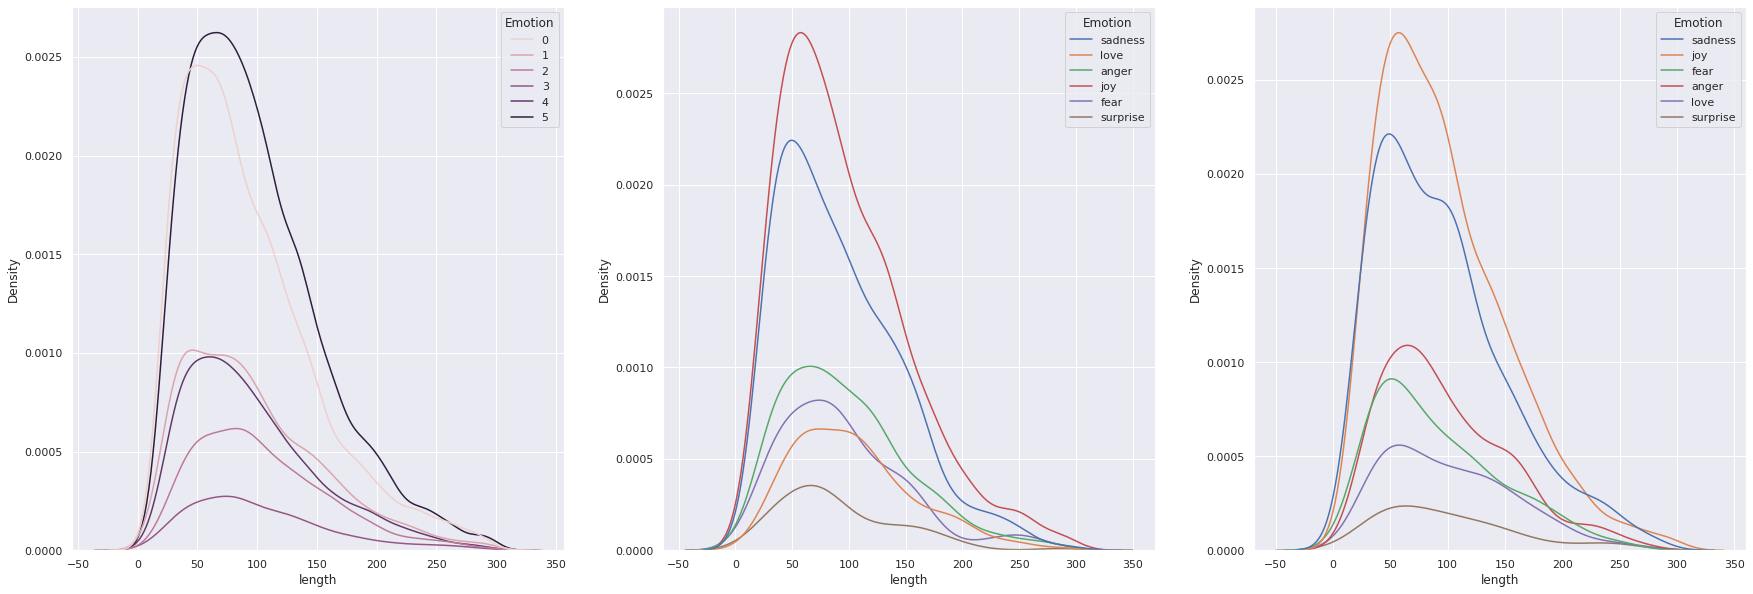

In [ ]:
all_data = {'Train Data': train, 'Validation Data': val, 'Test Data': test}
fig, ax = plt.subplots(1,3, figsize=(30,10))
for i, df in enumerate(all_data.values()):
    df2 = df.copy()
    df2['length'] = [len(x) for x in df2['Comment']]
    sns.kdeplot(data=df2,x='length',hue='Emotion', ax=ax[i])
plt.show()

In [ ]:
from wordcloud import WordCloud

def words_cloud(wordcloud, df):
    plt.figure(figsize=(10, 10))
    plt.title(str(df)+' Word Cloud', size = 16)
    plt.imshow(wordcloud) 
    # No axis details
    plt.axis("off");

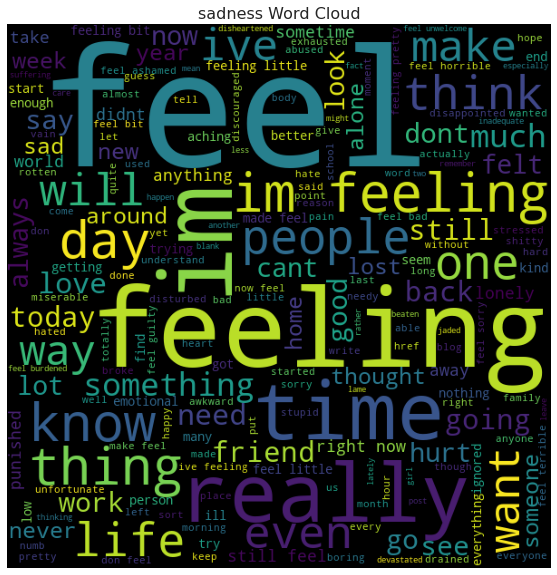

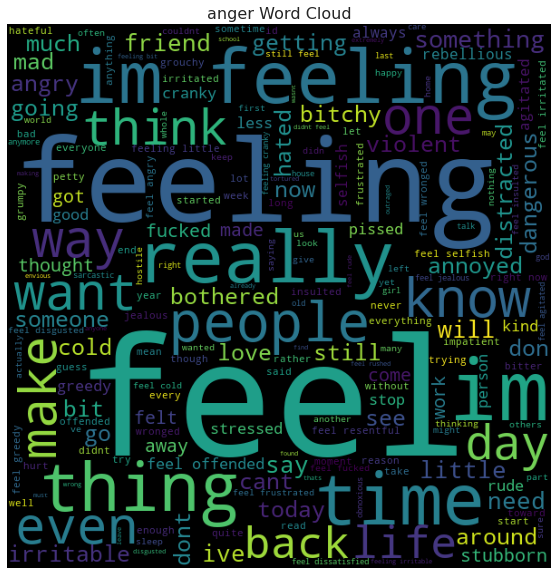

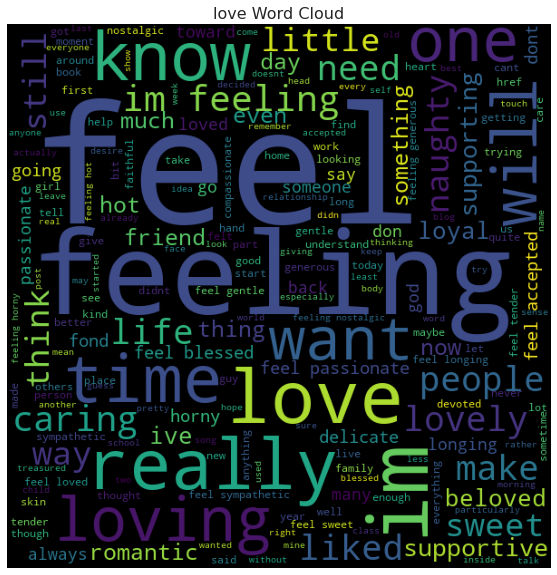

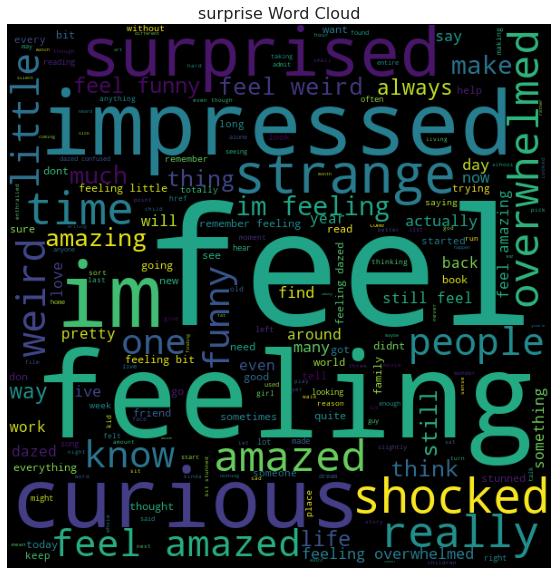

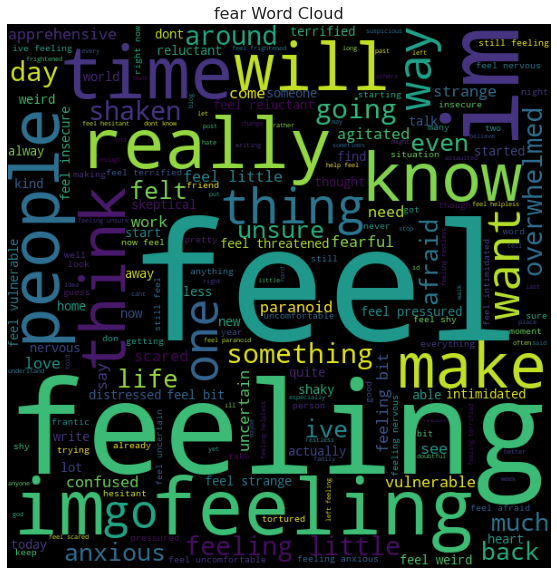

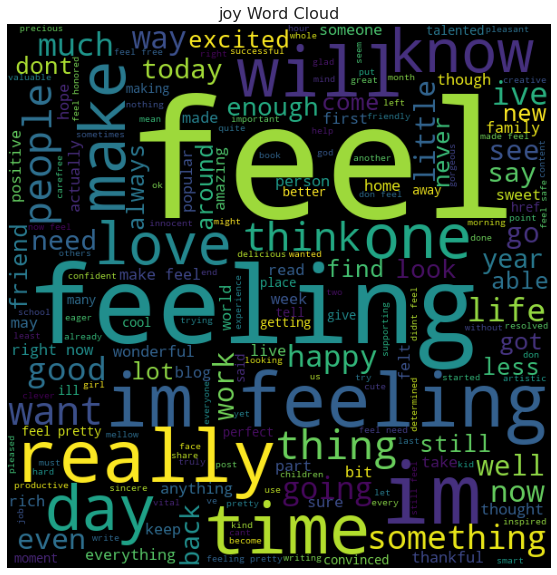

In [ ]:
emotions_list = train['Emotion'].unique()
for idx, emotion in enumerate(emotions_list):
    text = ' '.join([sentence for sentence in train.loc[train['Emotion'] == emotion,'Comment']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emo_list[idx])

In [ ]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import nltk
import pickle
import pyLDAvis.sklearn
from collections import Counter
from textblob import TextBlob
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, NMF
from wordcloud import WordCloud, ImageColorGenerator
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = train[['Emotion', 'lemmatized']]
df.head()

Emotion                                         lemmatized
0        0                                  [feel, humiliate]
1        0  [go, feeling, hopeless, damn, hopeful, around,...
2        1          [grab, minute, post, feel, greedy, wrong]
3        2  [ever, feel, nostalgic, fireplace, know, still...
4        1                                    [feel, grouchy]

In [ ]:
df['lemma_str'] = [' '.join(map(str,l)) for l in df['lemmatized']]
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Emotion                                         lemmatized  \
0        0                                  [feel, humiliate]   
1        0  [go, feeling, hopeless, damn, hopeful, around,...   
2        1          [grab, minute, post, feel, greedy, wrong]   
3        2  [ever, feel, nostalgic, fireplace, know, still...   
4        1                                    [feel, grouchy]   

                                           lemma_str  
0                                     feel humiliate  
1  go feeling hopeless damn hopeful around someon...  
2                 grab minute post feel greedy wrong  
3  ever feel nostalgic fireplace know still property  
4                                       feel grouchy

In [ ]:
df['sentiment'] = df['lemma_str'].apply(lambda x: TextBlob(x).sentiment.polarity)
df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Emotion                                         lemmatized  \
0        0                                  [feel, humiliate]   
1        0  [go, feeling, hopeless, damn, hopeful, around,...   
2        1          [grab, minute, post, feel, greedy, wrong]   
3        2  [ever, feel, nostalgic, fireplace, know, still...   
4        1                                    [feel, grouchy]   

                                           lemma_str  sentiment  
0                                     feel humiliate        0.0  
1  go feeling hopeless damn hopeful around someon...        0.0  
2                 grab minute post feel greedy wrong       -0.5  
3  ever feel nostalgic fireplace know still property       -0.5  
4                                       feel grouchy        0.0

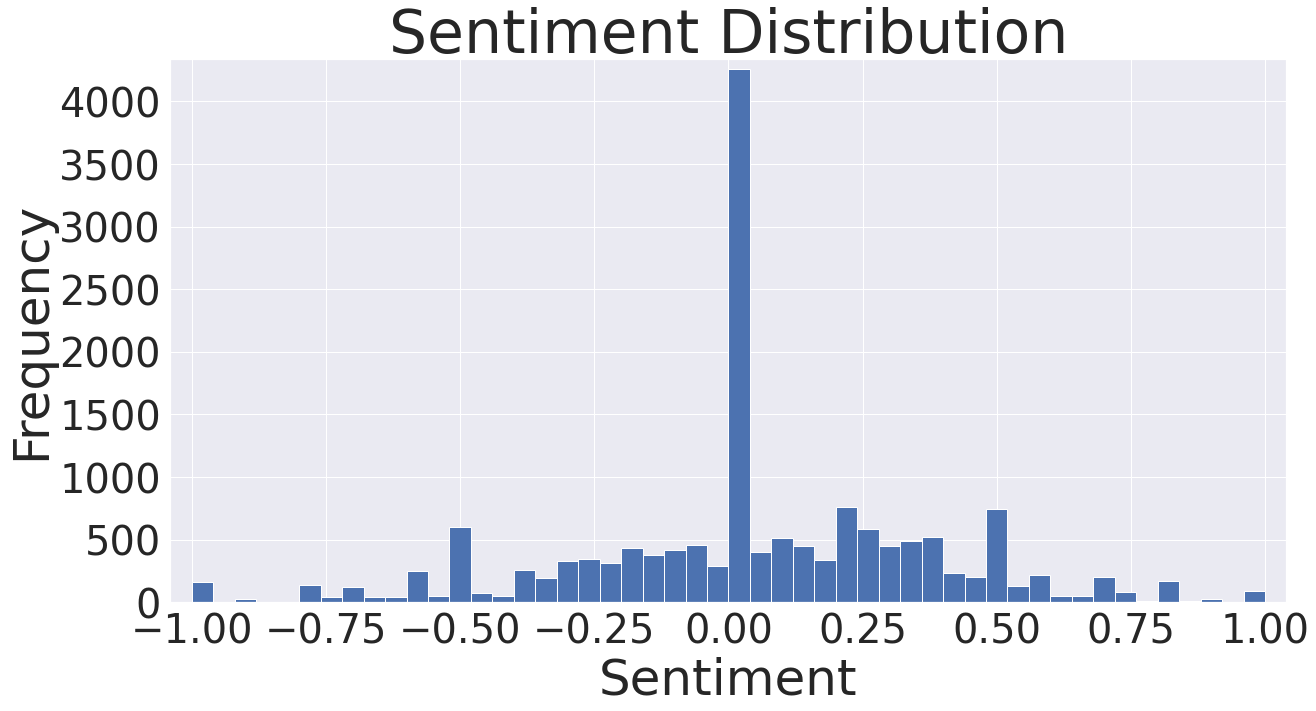

In [ ]:
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.xlabel('Sentiment', fontsize=50)
plt.xticks(fontsize=40)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.hist(df['sentiment'], bins=50)
plt.title('Sentiment Distribution', fontsize=60)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


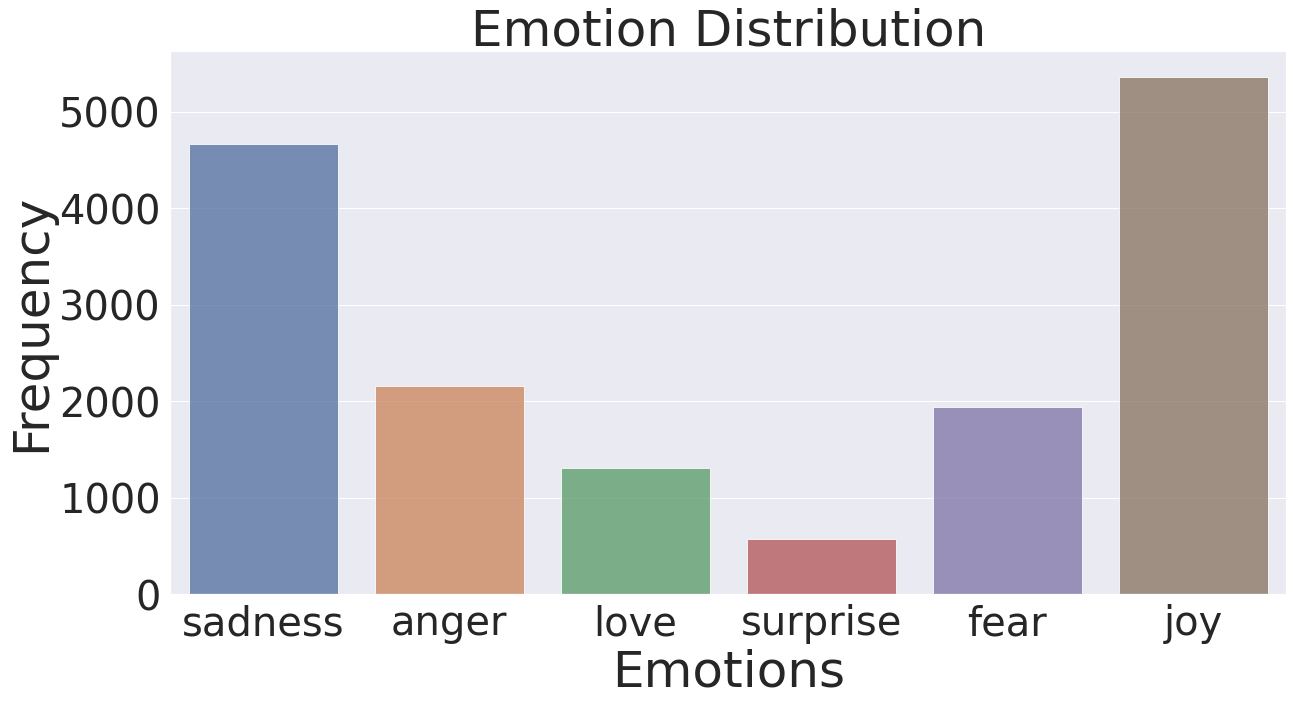

In [ ]:
x_rating = df.Emotion.value_counts().sort_index()

plt.figure(figsize=(20,10))
sns.barplot(emo_list, x_rating.values, alpha=0.8)
plt.title("Emotion Distribution", fontsize=50)
plt.ylabel('Frequency', fontsize=50)
plt.yticks(fontsize=40)
plt.xlabel('Emotions', fontsize=50)
plt.xticks(fontsize=40)
plt.show()

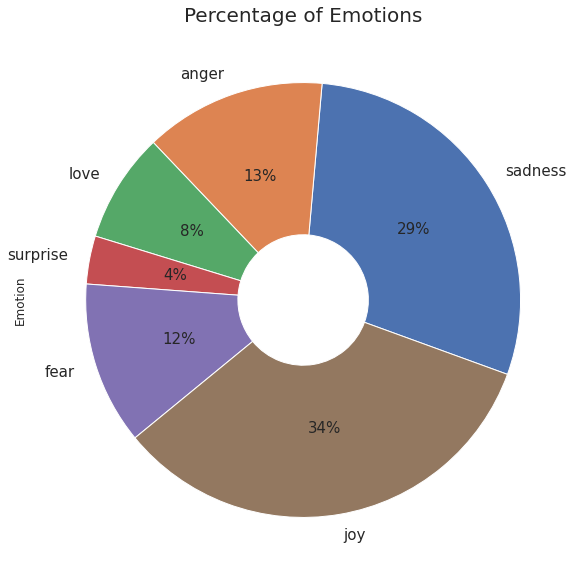

In [ ]:
plt.figure(figsize=(30,10))
plt.title('Percentage of Emotions', fontsize=20)
df.Emotion.value_counts().sort_index().plot(kind='pie', labels=emo_list,
                              wedgeprops=dict(width=.7), autopct='%1.0f%%', startangle= -20, 
                              textprops={'fontsize': 15})
plt.show()

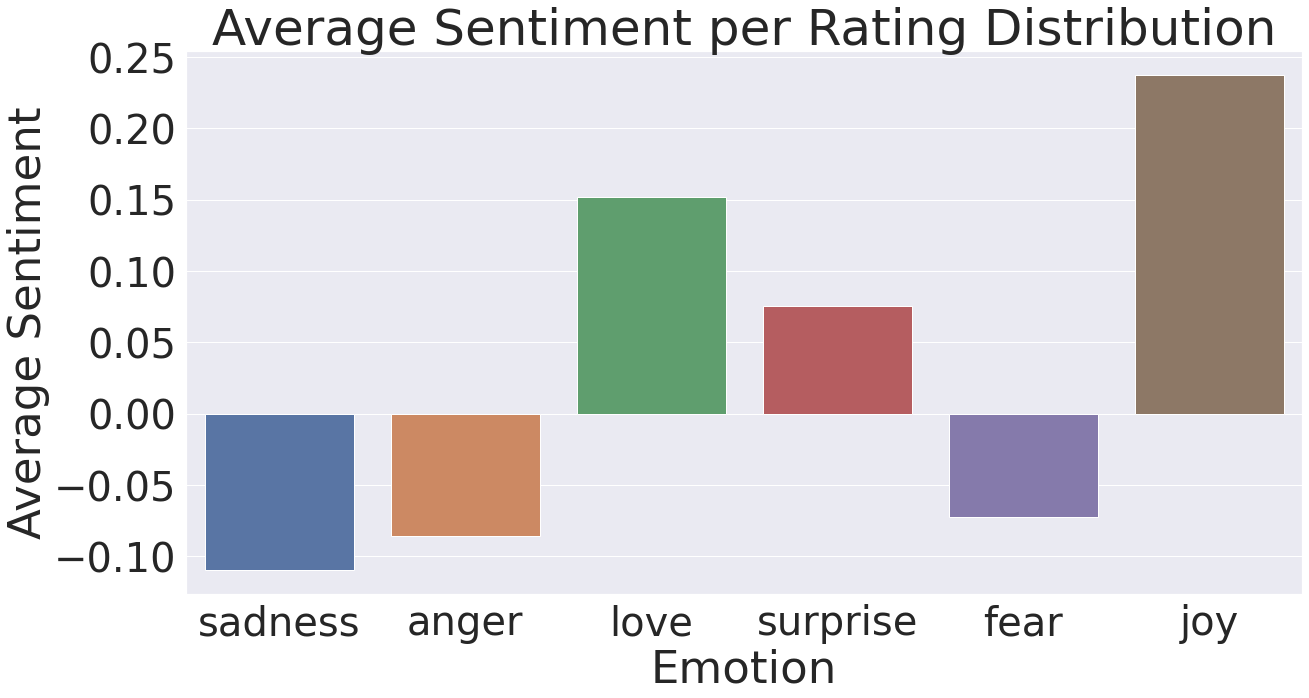

In [ ]:
plt.figure(figsize=(20,10))
sns.barplot(x=emo_list, y=df.groupby('Emotion')['sentiment'].mean())
plt.xlabel('Emotion', fontsize=45)
plt.ylabel('Average Sentiment', fontsize=45)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Sentiment per Rating Distribution', fontsize=50)
plt.show()

In [ ]:
df['word_count'] = df['lemmatized'].apply(lambda x: len(str(x).split()))
df['review_len'] = df['lemma_str'].astype(str).apply(len)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


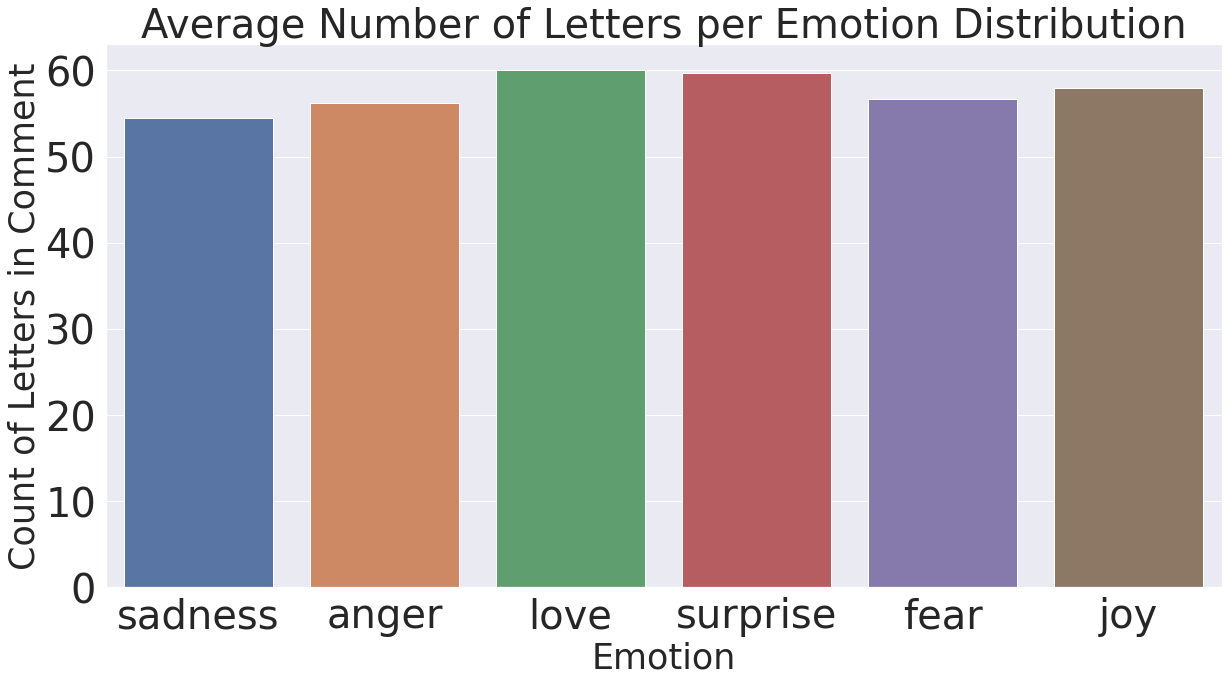

In [ ]:
letter_avg = df.groupby('Emotion')['review_len'].mean()
plt.figure(figsize=(20,10))
sns.barplot(x=emo_list, y=letter_avg)
plt.xlabel('Emotion', fontsize=35)
plt.ylabel('Count of Letters in Comment', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Letters per Emotion Distribution', fontsize=40)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


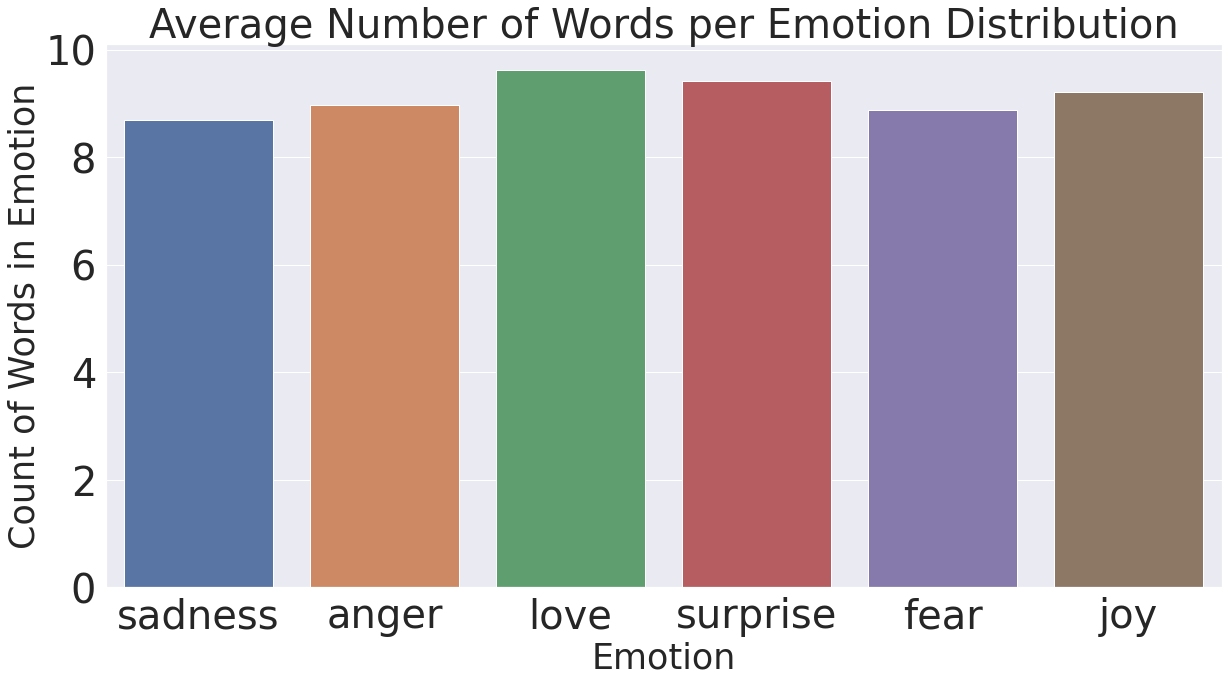

In [ ]:
word_avg = df.groupby('Emotion')['word_count'].mean()
plt.figure(figsize=(20,10))
sns.barplot(emo_list, word_avg)
plt.xlabel('Emotion', fontsize=35)
plt.ylabel('Count of Words in Emotion', fontsize=35)
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
plt.title('Average Number of Words per Emotion Distribution', fontsize=40)
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


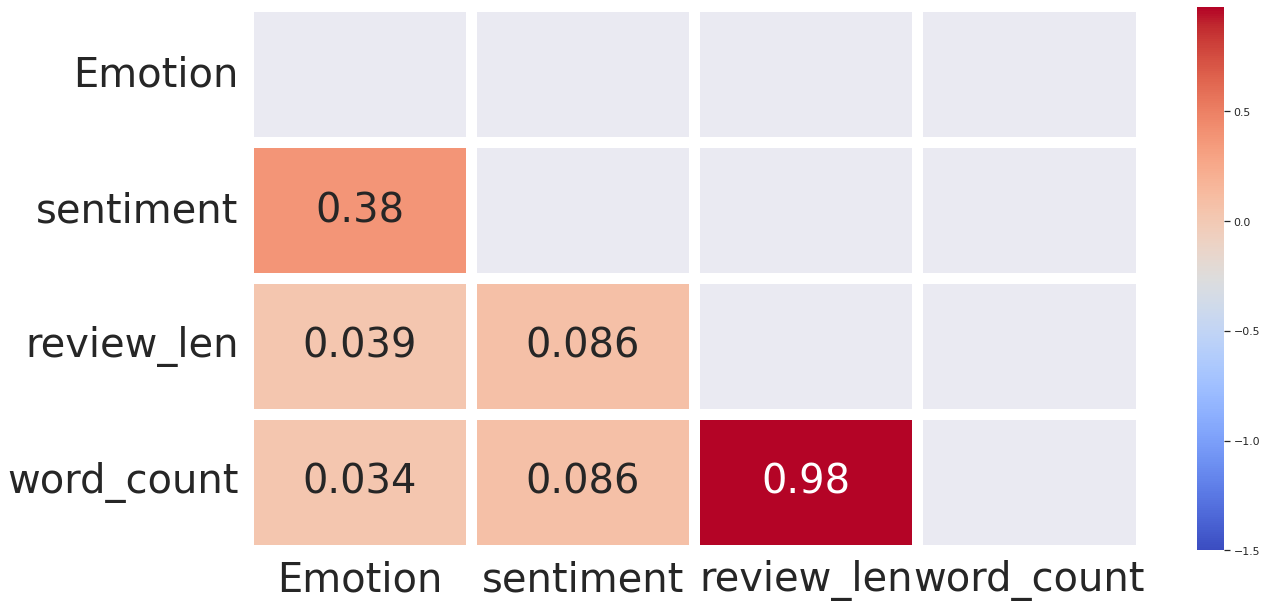

In [ ]:
correlation = df[['Emotion','sentiment', 'review_len', 'word_count']].corr()
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(20,10))
plt.xticks(fontsize=40)
plt.yticks(fontsize=40)
sns.heatmap(correlation, cmap='coolwarm', annot=True, annot_kws={"size": 40}, linewidths=10, vmin=-1.5, mask=mask)
plt.show()

In [ ]:
words = df['lemmatized']
allwords = []
for wordlist in words:
    allwords += wordlist
allwords

['feel',
 'humiliate',
 'go',
 'feeling',
 'hopeless',
 'damn',
 'hopeful',
 'around',
 'someone',
 'care',
 'awake',
 'grab',
 'minute',
 'post',
 'feel',
 'greedy',
 'wrong',
 'ever',
 'feel',
 'nostalgic',
 'fireplace',
 'know',
 'still',
 'property',
 'feel',
 'grouchy',
 'feel',
 'little',
 'burdened',
 'lately',
 'sure',
 'take',
 'milligram',
 'time',
 'recommend',
 'amount',
 'fall',
 'asleep',
 'lot',
 'faster',
 'also',
 'feel',
 'like',
 'funny',
 'feel',
 'confuse',
 'life',
 'teenager',
 'jade',
 'year',
 'old',
 'man',
 'petronas',
 'year',
 'feel',
 'petronas',
 'perform',
 'well',
 'make',
 'huge',
 'profit',
 'feel',
 'romantic',
 'feel',
 'like',
 'make',
 'suffer',
 'see',
 'mean',
 'something',
 'feel',
 'run',
 'divine',
 'experience',
 'expect',
 'type',
 'spiritual',
 'encounter',
 'think',
 'easy',
 'time',
 'year',
 'feel',
 'dissatisfy',
 'feel',
 'low',
 'energy',
 'thirsty',
 'immense',
 'sympathy',
 'general',
 'point',
 'possible',
 'proto',
 'writer',
 't

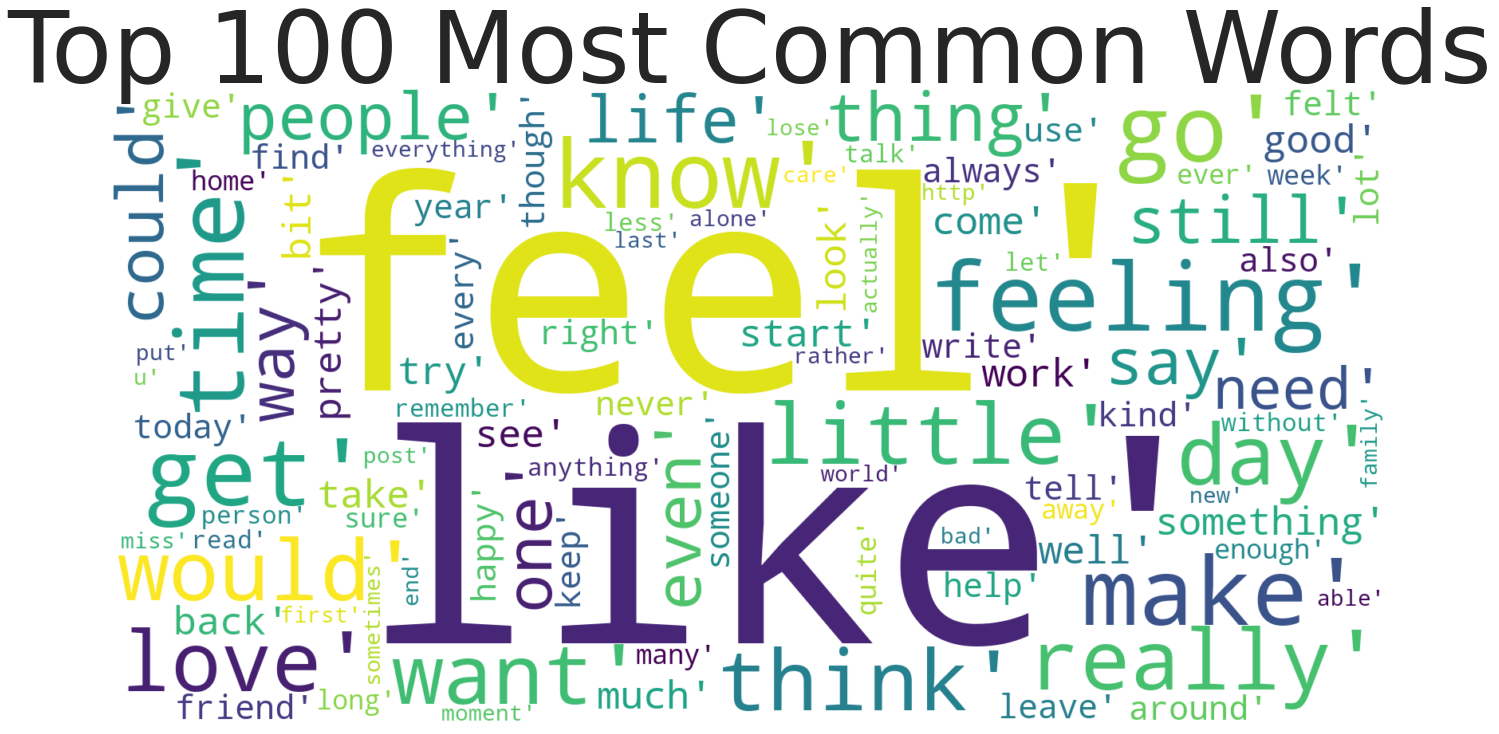

In [ ]:
mostcommon = FreqDist(allwords).most_common(100)
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(str(mostcommon))
fig = plt.figure(figsize=(30,10), facecolor='white')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('Top 100 Most Common Words', fontsize=100)
plt.tight_layout(pad=0)
plt.show()

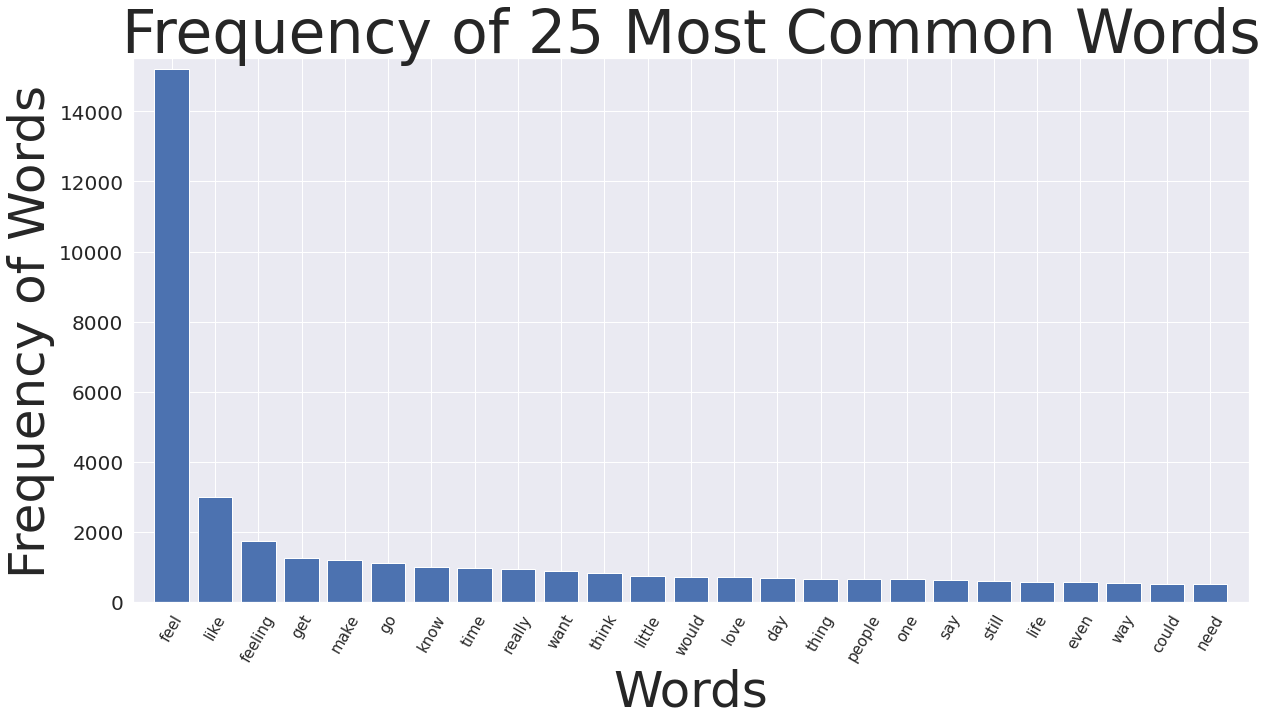

In [ ]:
mostcommon_small = FreqDist(allwords).most_common(25)
x, y = zip(*mostcommon_small)
plt.figure(figsize=(20,10))
plt.margins(0.02)
plt.bar(x, y)
plt.xlabel('Words', fontsize=50)
plt.ylabel('Frequency of Words', fontsize=50)
plt.yticks(fontsize=20)
plt.xticks(rotation=60, fontsize=15)
plt.title('Frequency of 25 Most Common Words', fontsize=60)
plt.show()

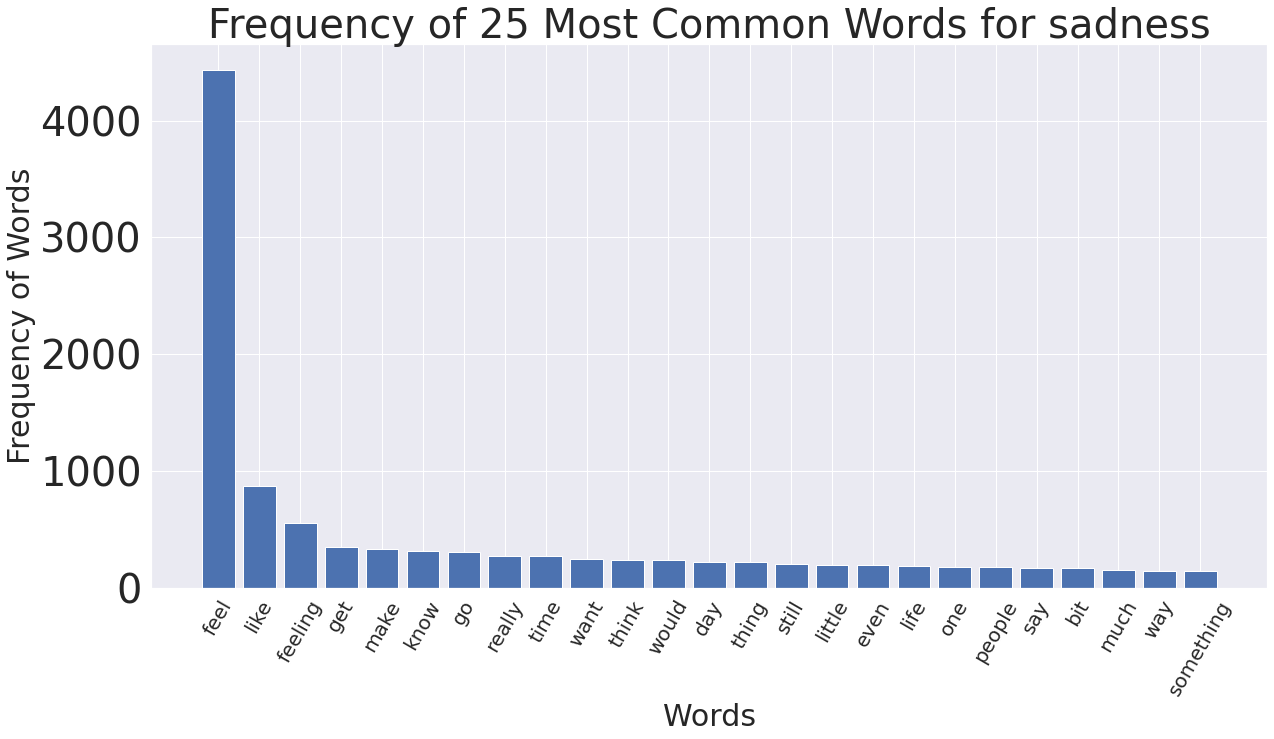

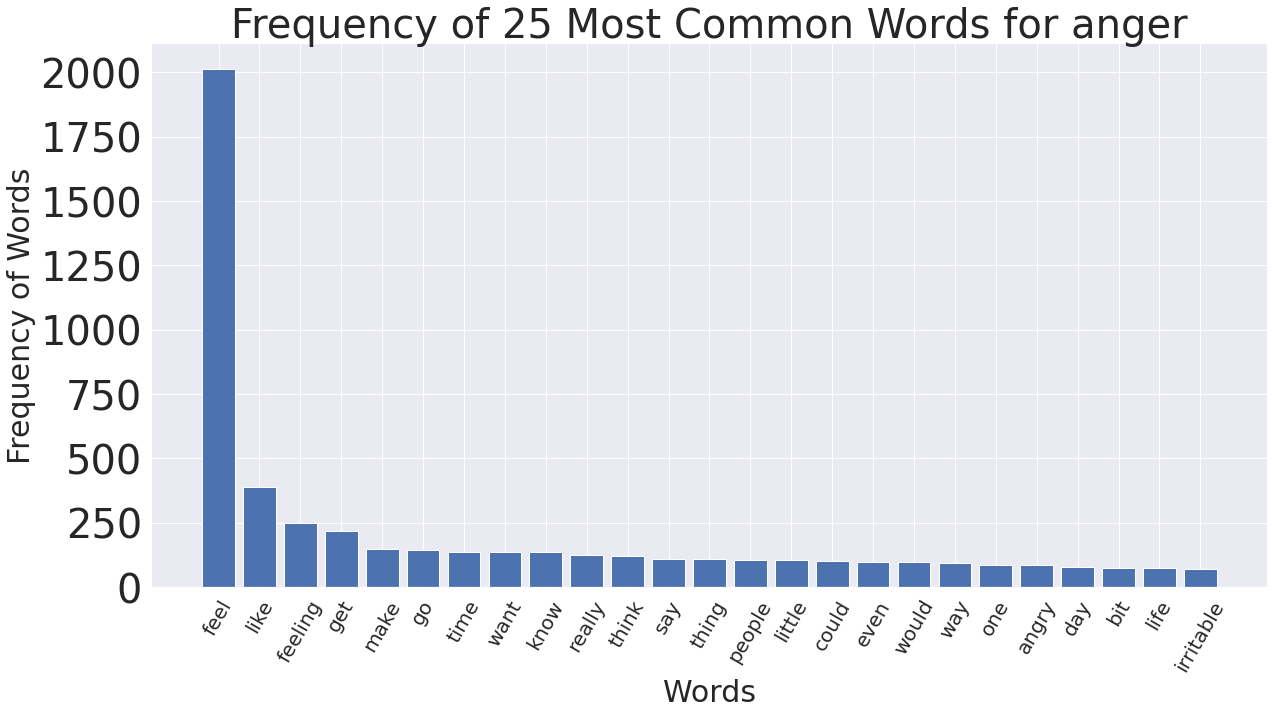

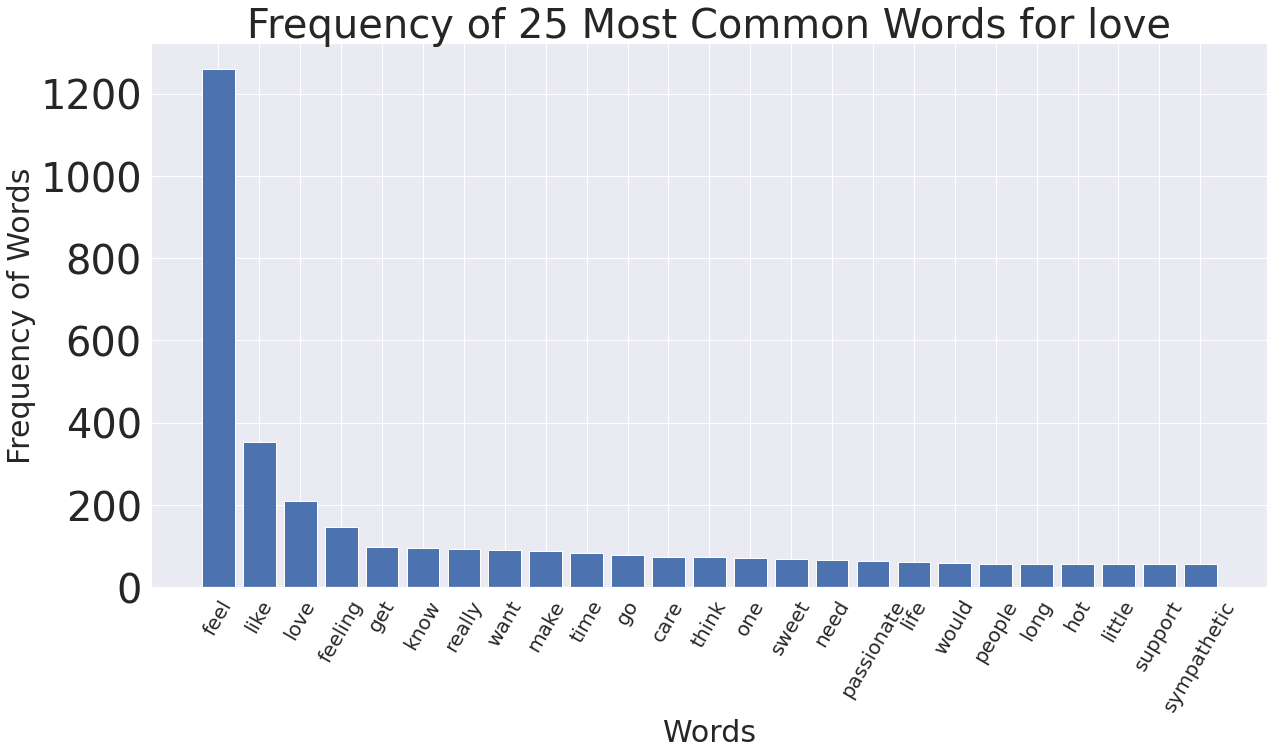

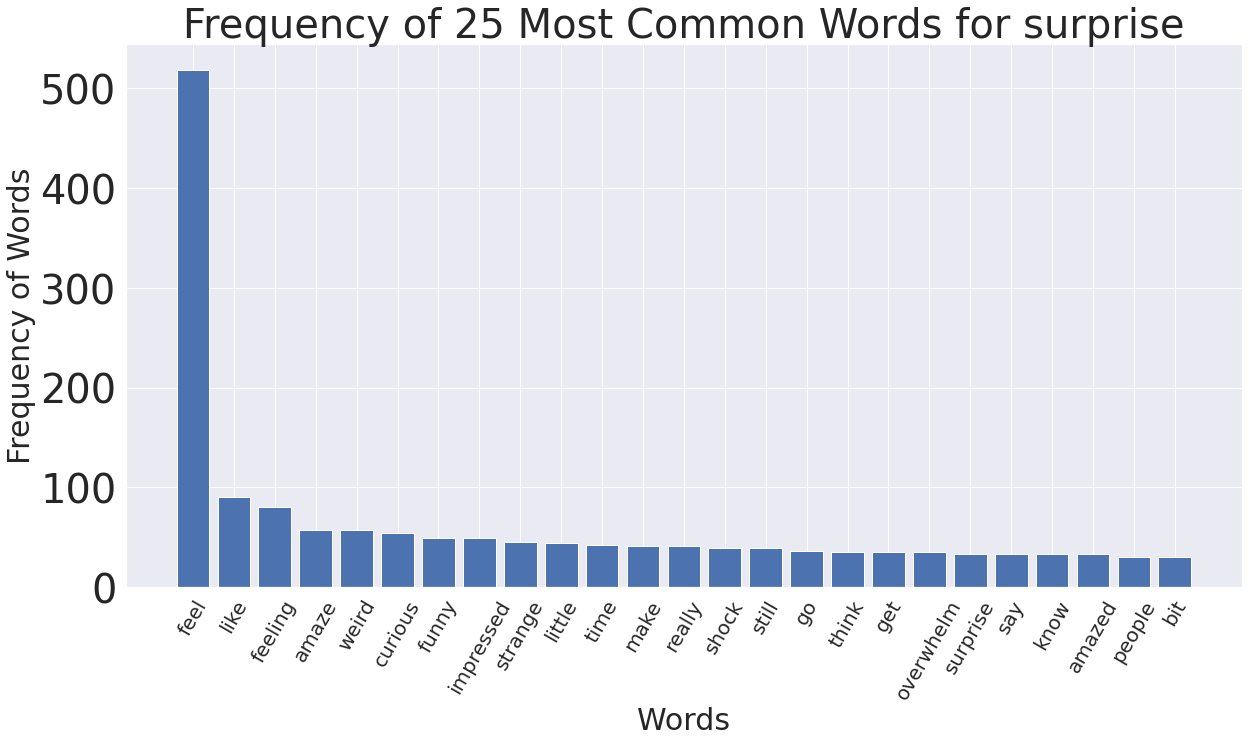

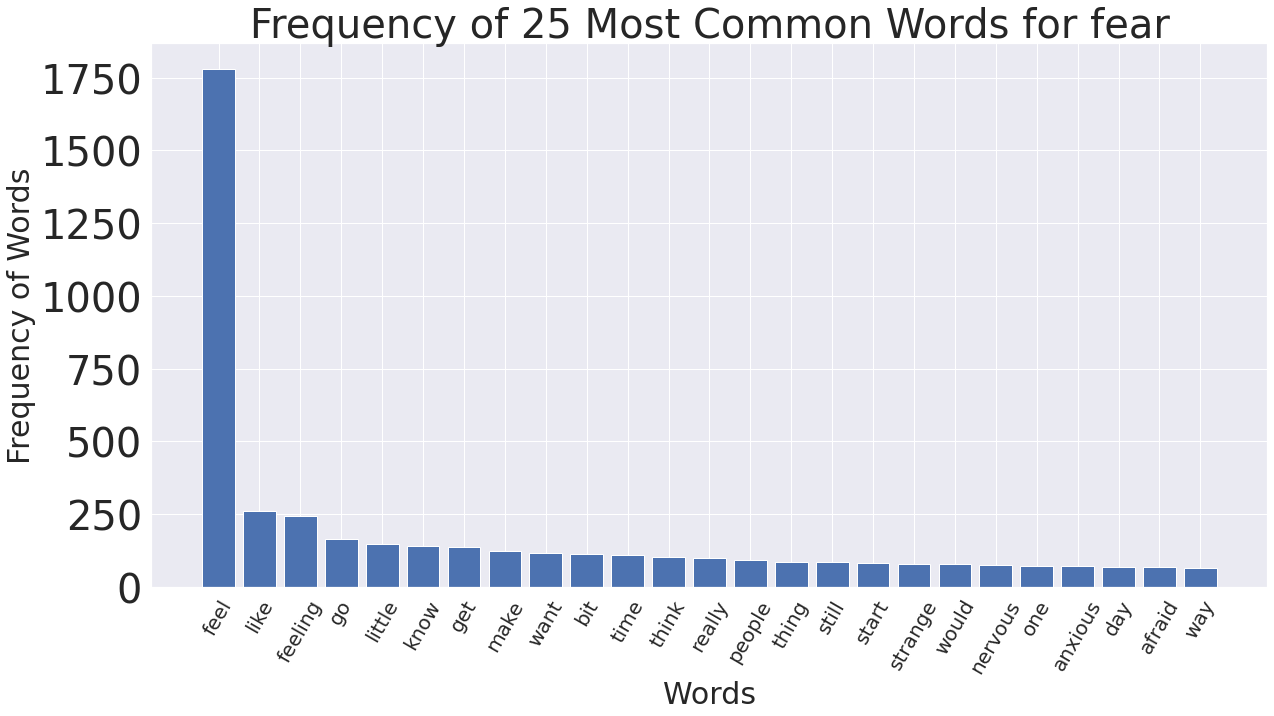

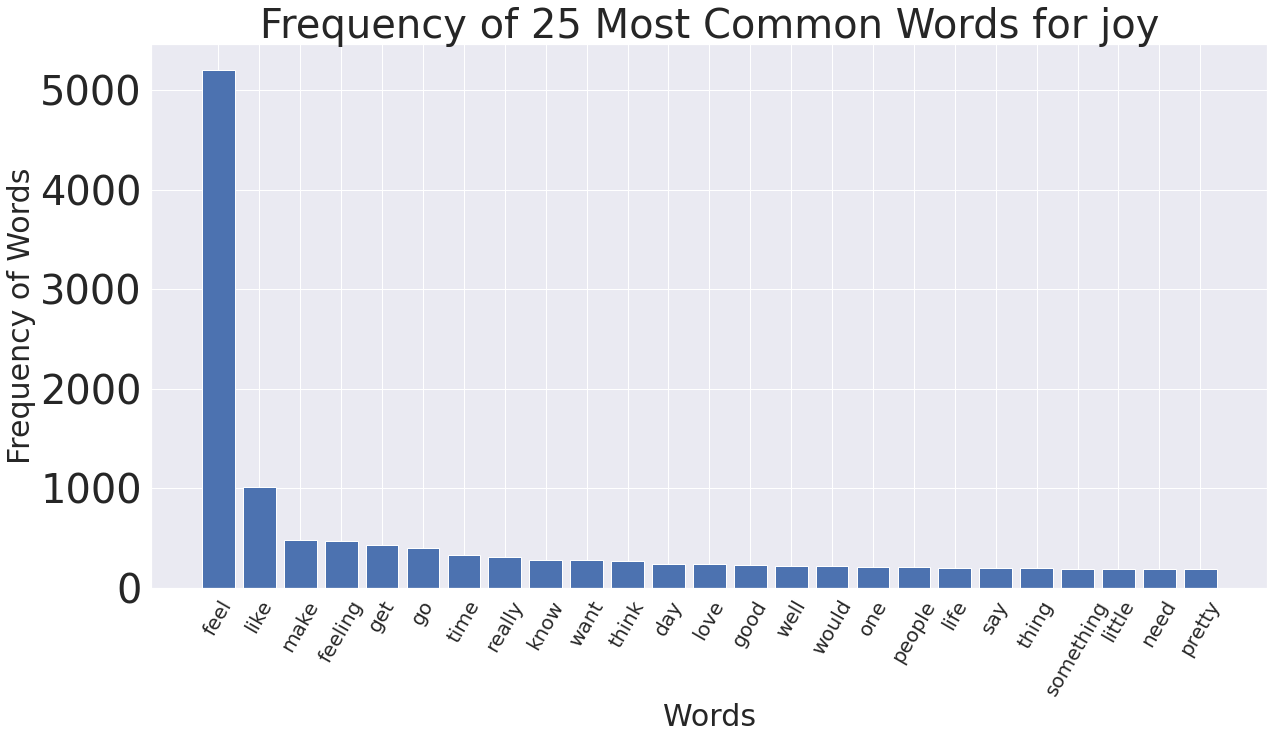

In [ ]:
group_by = df.groupby('Emotion')['lemma_str'].apply(lambda x: Counter(' '.join(x).split()).most_common(25))

for idx, temp in enumerate(emo_list):
  group_by_0 = group_by.iloc[idx]
  words0 = list(zip(*group_by_0))[0]
  freq0 = list(zip(*group_by_0))[1]
  plt.figure(figsize=(20,10))
  plt.bar(words0, freq0)
  plt.xlabel('Words', fontsize=30)
  plt.ylabel('Frequency of Words', fontsize=30)
  plt.yticks(fontsize=40)
  plt.xticks(rotation=60, fontsize=20)
  plt.title(f'Frequency of 25 Most Common Words for {temp}', fontsize=40)
  plt.show()

#Modelling

##base model

In [ ]:
import xgboost as xgb

In [ ]:
df

Emotion                                         lemmatized  \
0            0                                  [feel, humiliate]   
1            0  [go, feeling, hopeless, damn, hopeful, around,...   
2            1          [grab, minute, post, feel, greedy, wrong]   
3            2  [ever, feel, nostalgic, fireplace, know, still...   
4            1                                    [feel, grouchy]   
...        ...                                                ...   
15995        0  [brief, time, beanbag, say, anna, feel, like, ...   
15996        0  [turn, feel, pathetic, still, wait, table, sub...   
15997        5                      [feel, strong, good, overall]   
15998        1                  [feel, like, rude, comment, glad]   
15999        0                 [know, lot, feel, stupid, portray]   

                                               lemma_str  sentiment  \
0                                         feel humiliate   0.000000   
1      go feeling hopeless damn hopeful around someon...   0.000000   
2                     grab minute post feel greedy wrong  -0.500000   
3      ever feel nostalgic fireplace know still property  -0.500000   
4                                           feel grouchy   0.000000   
...                                                  ...        ...   
15995       brief time beanbag say anna feel like beaten   0.000000   
15996  turn feel pathetic still wait table sub teach ...  -1.000000   
15997                           feel strong good overall   0.377778   
15998                        feel like rude comment glad   0.100000   
15999                       know lot feel stupid portray  -0.800000   

       word_count  review_len  
0               2          14  
1               9          58  
2               6          34  
3               7          49  
4               2          12  
...           ...         ...  
15995           8          44  
15996           9          52  
15997           4          24  
15998           5          27  
15999           5          28  

[16000 rows x 6 columns]

In [ ]:
X = df.lemma_str
y = df.Emotion

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=42, train_size=0.8)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train_vect = vectorizer.fit_transform(X_train)
X_val_vect = vectorizer.transform(X_val)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
model = MultinomialNB()

In [ ]:
model.fit(X_train_vect, y_train)

MultinomialNB()

In [ ]:
preds = model.predict(X_val_vect)

In [ ]:
xgb_model = xgb.XGBClassifier()
xgb_model.fit(X_train_vect, y_train)


XGBClassifier(objective='multi:softprob')

In [ ]:
xgb_pred = xgb_model.predict(X_val_vect)

accuracy_score(xgb_pred, y_val)

0.7059375

##Evaluation

In [ ]:
from sklearn.metrics import confusion_matrix

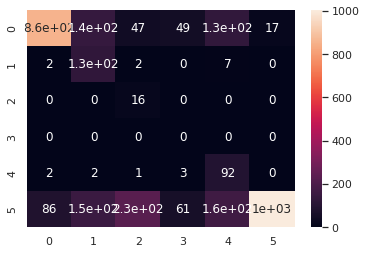

In [ ]:
import seaborn as sns
sns.heatmap(confusion_matrix(preds, y_val), annot=True)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, f1_score

In [ ]:
accuracy_score(preds, y_val)

0.655

In [ ]:
f1_score(preds, y_val, average='weighted')

0.7277772670693303

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.69      0.90      0.78       946
           1       0.92      0.30      0.45       427
           2       1.00      0.05      0.10       296
           3       0.00      0.00      0.00       113
           4       0.92      0.23      0.37       397
           5       0.59      0.98      0.74      1021

    accuracy                           0.66      3200
   macro avg       0.69      0.41      0.41      3200
weighted avg       0.72      0.66      0.58      3200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


##word2vec

In [ ]:
!pip install --upgrade gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import gensim

In [ ]:
from gensim.models.word2vec import Word2Vec

model = Word2Vec(df.lemmatized)  
word_vectors = model.wv

In [ ]:
vector_dct = {}
for word in model.wv.key_to_index: 
    vector_dct[word] = word_vectors[word]

w2v_df = pd.DataFrame(vector_dct).T

In [ ]:
w2v_df

0         1         2         3         4         5         6   \
feel    -0.129323  0.276317  0.013420  0.280079 -0.094696 -0.497748  0.165943   
like    -0.159755  0.330315 -0.003403  0.249251  0.014252 -0.458918  0.180148   
feeling -0.124874  0.297512 -0.026473  0.216792 -0.001531 -0.482957  0.144959   
get     -0.153194  0.334010 -0.016150  0.214265 -0.000195 -0.504901  0.179462   
make    -0.162951  0.317473 -0.015394  0.229386 -0.003529 -0.469882  0.179993   
...           ...       ...       ...       ...       ...       ...       ...   
alcohol -0.023103  0.057641  0.005527  0.036366  0.009357 -0.099001  0.030899   
thereby -0.023840  0.044638 -0.009962  0.034012 -0.004142 -0.090260  0.024715   
cell    -0.010982  0.042025  0.005118  0.042277  0.006570 -0.082462  0.032599   
extreme -0.018780  0.056039 -0.004995  0.032506 -0.002689 -0.082474  0.026407   
tease   -0.026517  0.045451  0.006265  0.041116  0.006526 -0.070933  0.025108   

               7         8         9   ...        90        91        92  \
feel     0.831652 -0.295709 -0.233943  ...  0.470593  0.221955  0.216425   
like     0.852854 -0.225110 -0.242183  ...  0.442309  0.195023  0.077493   
feeling  0.855710 -0.294967 -0.180351  ...  0.436683  0.266265  0.176187   
get      0.901260 -0.235482 -0.234169  ...  0.460065  0.216313  0.109771   
make     0.873214 -0.240944 -0.220292  ...  0.458253  0.206015  0.115777   
...           ...       ...       ...  ...       ...       ...       ...   
alcohol  0.161409 -0.041696 -0.038342  ...  0.077226  0.052197  0.027795   
thereby  0.144836 -0.044904 -0.041109  ...  0.077924  0.051891  0.029954   
cell     0.137852 -0.040636 -0.025790  ...  0.060220  0.028050  0.012369   
extreme  0.157298 -0.053130 -0.045515  ...  0.069890  0.050452  0.015549   
tease    0.132465 -0.037026 -0.030583  ...  0.070961  0.046256  0.017396   

               93        94        95        96        97        98        99  
feel     0.152942  0.794964  0.456811  0.050850 -0.392779  0.151777  0.033756  
like     0.114907  0.678702  0.431874  0.108727 -0.341620 -0.033887  0.072706  
feeling  0.144857  0.787946  0.474627  0.108894 -0.395226  0.146219  0.008140  
get      0.138195  0.765523  0.465792  0.131914 -0.398853  0.052148  0.015018  
make     0.142826  0.712390  0.435834  0.106980 -0.357669  0.021475  0.053849  
...           ...       ...       ...       ...       ...       ...       ...  
alcohol  0.021017  0.140483  0.084636  0.017074 -0.081822  0.019651  0.013799  
thereby  0.026727  0.132160  0.082148  0.021454 -0.077854  0.013215  0.006067  
cell     0.030835  0.111316  0.059864  0.007299 -0.057257  0.005430  0.004909  
extreme  0.027315  0.131931  0.082444  0.024936 -0.070698  0.007302  0.011890  
tease    0.026092  0.119040  0.078809  0.013134 -0.057335  0.005419  0.003535  

[2946 rows x 100 columns]

In [ ]:
word_vectors['tease']

array([-0.02651705,  0.04545099,  0.00626464,  0.04111583,  0.00652579,
       -0.07093347,  0.0251082 ,  0.13246547, -0.0370256 , -0.03058272,
       -0.03508408, -0.06241322, -0.03326273,  0.04853009,  0.02683394,
       -0.03867455,  0.01553472, -0.04192873,  0.02299897, -0.1296965 ,
        0.0377289 ,  0.02729146,  0.06905098, -0.03501887, -0.00246193,
       -0.03144319, -0.02409756, -0.01108166, -0.07127099,  0.01281207,
        0.03274236,  0.00568526,  0.03073124, -0.04942144, -0.01542578,
        0.04159516,  0.02030255, -0.03995407, -0.02340532, -0.12647511,
       -0.00637355, -0.06077696, -0.04597936, -0.00251109,  0.01735292,
       -0.04679989, -0.03366375,  0.00316974,  0.04905907,  0.04889369,
        0.02935395, -0.02365504, -0.0023426 , -0.02234434, -0.01626958,
        0.02955157,  0.04894535, -0.00747997, -0.08754352,  0.04745876,
        0.00956323,  0.00508691,  0.01322562, -0.02748876, -0.09251038,
        0.03077415,  0.00579726,  0.0702773 , -0.03639181,  0.07

In [ ]:
from sklearn.manifold import TSNE

# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)

# Use only 400 rows to shorten processing time
tsne_df = tsne.fit_transform(w2v_df[:400])

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


In [ ]:
!pip install adjustText

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


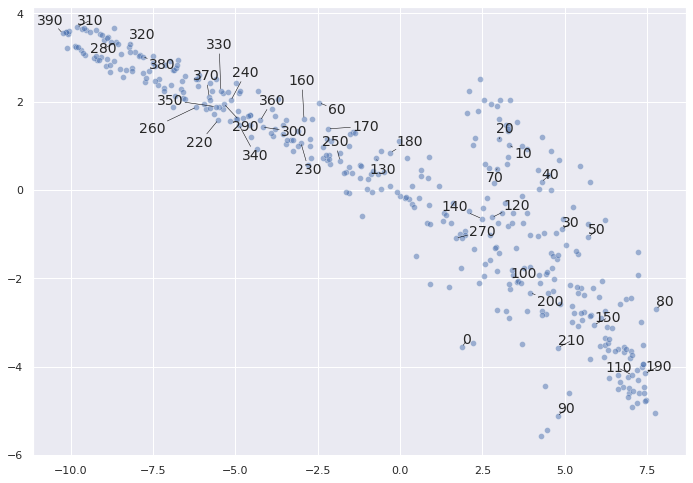

In [ ]:
sns.set()
# Initialize figure
fig, ax = plt.subplots(figsize = (11.7, 8.27))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.5)

# Import adjustText, initialize list of texts
from adjustText import adjust_text
texts = []
words_to_plot = list(np.arange(0, 400, 10))

# Append words to list
for word in words_to_plot:
    texts.append(plt.text(tsne_df[word, 0], tsne_df[word, 1], df.index[word], fontsize = 14))
    
# Plot text using adjust_text (because overlapping text is hard to read)
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "-", color = 'black', lw = 0.5))

plt.show()

In [ ]:
x = []
for doc in df.lemmatized: # append the vector for each document
    doc = [word for word in doc if word in word_vectors.key_to_index]
    try:
      temp = np.mean(word_vectors[doc], axis=0)
    except:
      temp = 0
    x.append(temp)
    
X = np.array(x) # list to array

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
emp = pd.DataFrame()

In [ ]:
for idx, i in enumerate(X):
    emp[str(idx)] = i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


In [ ]:
X = emp.T

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15, random_state=10)

# as a reminder, x is the array with our 300-dimensional vectors
reduced_vecs = pca.fit_transform(X)

/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  kwargs['lwork'] = ret[-2][0].real.astype(numpy.int)
/usr/local/lib/python3.7/dist-packages/scipy/linalg/decomp_qr.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, ch

In [ ]:
reduced_vecs

array([[ 1.98835442e-02, -2.09431117e-02,  1.77258475e-01, ...,
        -3.89664813e-03, -1.59905125e-03,  2.48537594e-05],
       [-1.52387772e-02, -1.80907162e-02, -5.63026608e-02, ...,
        -4.61264386e-03,  2.22426593e-03, -1.05234894e-03],
       [-7.38244951e-02,  7.52819382e-02,  1.00136982e-02, ...,
        -5.60471193e-03, -5.93894617e-03, -9.10362583e-04],
       ...,
       [-3.76550739e-02, -4.00854573e-03,  4.20620845e-02, ...,
         3.63457857e-03,  2.53236065e-03, -1.16281012e-02],
       [-7.78779366e-02, -2.99020210e-02, -1.29228281e-02, ...,
         1.28942830e-03, -4.04180045e-03, -3.45263302e-03],
       [ 8.37139135e-02, -4.87025860e-02,  1.36888620e-02, ...,
         1.38330578e-03, -1.04943441e-03, -3.06849631e-04]])

In [ ]:
import xgboost as xgb

In [ ]:
model = xgb.XGBClassifier()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(reduced_vecs, df.Emotion, test_size=0.2, random_state=42)

In [ ]:
sc = MinMaxScaler()

X_train = sc.fit_transform(X_train)
X_val = sc.transform(X_val)

In [ ]:
model.fit(X_train, y_train)

XGBClassifier(objective='multi:softprob')

In [ ]:
preds = model.predict(X_val)

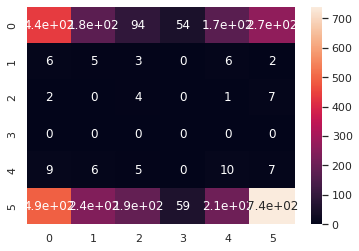

In [ ]:
sns.heatmap(confusion_matrix(preds, y_val), annot=True)
plt.show()

In [ ]:
accuracy_score(preds, y_val)

0.373125

In [ ]:
print(classification_report(y_val, preds))

              precision    recall  f1-score   support

           0       0.36      0.46      0.41       946
           1       0.23      0.01      0.02       427
           2       0.29      0.01      0.03       296
           3       0.00      0.00      0.00       113
           4       0.27      0.03      0.05       397
           5       0.38      0.72      0.50      1021

    accuracy                           0.37      3200
   macro avg       0.26      0.21      0.17      3200
weighted avg       0.32      0.37      0.29      3200



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#predicts

In [ ]:
def pre(train):
  train['no_contract'] = train['Comment'].apply(lambda x: [contractions.fix(word) for word in x.split()])
  train['comment_str'] = [' '.join(map(str, l)) for l in train['no_contract']]
  train['tokenized'] = train['comment_str'].apply(word_tokenize)
  train['lower'] = train['tokenized'].apply(lambda x: [word.lower() for word in x])
  punc = string.punctuation
  train['no_punc'] = train['lower'].apply(lambda x: [word for word in x if word not in punc])
  stop_words = set(stopwords.words('english'))
  train['stopwords_removed'] = train['no_punc'].apply(lambda x: [word for word in x if word not in stop_words])
  train['pos_tags'] = train['stopwords_removed'].apply(nltk.tag.pos_tag)
  def get_wordnet_pos(tag):
      if tag.startswith('J'):
          return wordnet.ADJ
      elif tag.startswith('V'):
          return wordnet.VERB
      elif tag.startswith('N'):
          return wordnet.NOUN
      elif tag.startswith('R'):
          return wordnet.ADV
      else:
          return wordnet.NOUN
  train['wordnet_pos'] = train['pos_tags'].apply(lambda x: [(word, get_wordnet_pos(pos_tag)) for (word, pos_tag) in x])
  wnl = WordNetLemmatizer()
  train['lemmatized'] = train['wordnet_pos'].apply(lambda x: [wnl.lemmatize(word, tag) for word, tag in x])
  train['lemma_str'] = [' '.join(map(str,l)) for l in train['lemmatized']]
  return train

In [ ]:
poro = pre(test)

In [ ]:
poro

Comment  Emotion  \
0     im feeling rather rotten so im not very ambiti...  sadness   
1             im updating my blog because i feel shitty  sadness   
2     i never make her separate from me because i do...  sadness   
3     i left with my bouquet of red and yellow tulip...      joy   
4       i was feeling a little vain when i did this one  sadness   
...                                                 ...      ...   
1995  i just keep feeling like someone is being unki...    anger   
1996  im feeling a little cranky negative after this...    anger   
1997  i feel that i am useful to my people and that ...      joy   
1998  im feeling more comfortable with derby i feel ...      joy   
1999  i feel all weird when i have to meet w people ...     fear   

                                            no_contract  \
0     [i am, feeling, rather, rotten, so, i am, not,...   
1     [i am, updating, my, blog, because, i, feel, s...   
2     [i, never, make, her, separate, from, me, beca...   
3     [i, left, with, my, bouquet, of, red, and, yel...   
4     [i, was, feeling, a, little, vain, when, i, di...   
...                                                 ...   
1995  [i, just, keep, feeling, like, someone, is, be...   
1996  [i am, feeling, a, little, cranky, negative, a...   
1997  [i, feel, that, i, am, useful, to, my, people,...   
1998  [i am, feeling, more, comfortable, with, derby...   
1999  [i, feel, all, weird, when, i, have, to, meet,...   

                                            comment_str  \
0     i am feeling rather rotten so i am not very am...   
1           i am updating my blog because i feel shitty   
2     i never make her separate from me because i do...   
3     i left with my bouquet of red and yellow tulip...   
4       i was feeling a little vain when i did this one   
...                                                 ...   
1995  i just keep feeling like someone is being unki...   
1996  i am feeling a little cranky negative after th...   
1997  i feel that i am useful to my people and that ...   
1998  i am feeling more comfortable with derby i fee...   
1999  i feel all weird when i have to meet w people ...   

                                              tokenized  \
0     [i, am, feeling, rather, rotten, so, i, am, no...   
1     [i, am, updating, my, blog, because, i, feel, ...   
2     [i, never, make, her, separate, from, me, beca...   
3     [i, left, with, my, bouquet, of, red, and, yel...   
4     [i, was, feeling, a, little, vain, when, i, di...   
...                                                 ...   
1995  [i, just, keep, feeling, like, someone, is, be...   
1996  [i, am, feeling, a, little, cranky, negative, ...   
1997  [i, feel, that, i, am, useful, to, my, people,...   
1998  [i, am, feeling, more, comfortable, with, derb...   
1999  [i, feel, all, weird, when, i, have, to, meet,...   

                                                  lower  \
0     [i, am, feeling, rather, rotten, so, i, am, no...   
1     [i, am, updating, my, blog, because, i, feel, ...   
2     [i, never, make, her, separate, from, me, beca...   
3     [i, left, with, my, bouquet, of, red, and, yel...   
4     [i, was, feeling, a, little, vain, when, i, di...   
...                                                 ...   
1995  [i, just, keep, feeling, like, someone, is, be...   
1996  [i, am, feeling, a, little, cranky, negative, ...   
1997  [i, feel, that, i, am, useful, to, my, people,...   
1998  [i, am, feeling, more, comfortable, with, derb...   
1999  [i, feel, all, weird, when, i, have, to, meet,...   

                                                no_punc  \
0     [i, am, feeling, rather, rotten, so, i, am, no...   
1     [i, am, updating, my, blog, because, i, feel, ...   
2     [i, never, make, her, separate, from, me, beca...   
3     [i, left, with, my, bouquet, of, red, and, yel...   
4     [i, was, feeling, a, little, vain, when, i, di...   
...                                      

In [ ]:
x = []
for doc in df.lemmatized: # append the vector for each document
    doc = [word for word in doc if word in word_vectors.key_to_index]
    try:
      temp = np.mean(word_vectors[doc], axis=0)
    except:
      temp = 0
    x.append(temp)
    
X = np.array(x) # list to array

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
emp = pd.DataFrame()

for idx, i in enumerate(X):
    emp[str(idx)] = i

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.


In [ ]:
X = emp.T

In [ ]:
X

0         1         2         3         4         5         6   \
0     -0.100531  0.233076 -0.002652  0.213668 -0.045702 -0.412098  0.135780   
1     -0.106116  0.255885 -0.014041  0.178800 -0.007450 -0.411033  0.138031   
2     -0.094505  0.247524 -0.014526  0.186995 -0.014347 -0.428901  0.136887   
3     -0.112148  0.276965 -0.010639  0.220484 -0.021047 -0.443560  0.160849   
4     -0.088976  0.199655  0.003501  0.181251 -0.047598 -0.344158  0.118638   
...         ...       ...       ...       ...       ...       ...       ...   
15995 -0.117688  0.274348 -0.003386  0.220752 -0.014793 -0.437872  0.157102   
15996 -0.091622  0.223954 -0.009448  0.169220 -0.010435 -0.366019  0.125299   
15997 -0.098952  0.252849 -0.007568  0.199394 -0.021383 -0.414488  0.144431   
15998 -0.110071  0.265460 -0.007502  0.207734 -0.016569 -0.422043  0.145375   
15999 -0.098054  0.236514 -0.005669  0.190149 -0.021332 -0.398530  0.137559   

             7         8         9   ...        90        91        92  \
0      0.693148 -0.230104 -0.180713  ...  0.379009  0.185543  0.150064   
1      0.718603 -0.216219 -0.179327  ...  0.375004  0.202383  0.106238   
2      0.719321 -0.237518 -0.167580  ...  0.378647  0.212491  0.120228   
3      0.775502 -0.241516 -0.198564  ...  0.414162  0.207904  0.118365   
4      0.575392 -0.200778 -0.151269  ...  0.315351  0.160466  0.130162   
...         ...       ...       ...  ...       ...       ...       ...   
15995  0.776174 -0.234385 -0.209963  ...  0.416930  0.198050  0.116288   
15996  0.632356 -0.200882 -0.156331  ...  0.333777  0.174936  0.096309   
15997  0.712022 -0.225017 -0.184076  ...  0.380750  0.198188  0.123251   
15998  0.731133 -0.228404 -0.186469  ...  0.388572  0.199429  0.114255   
15999  0.684188 -0.207789 -0.178008  ...  0.361556  0.187066  0.110325   

             93        94        95        96        97        98        99  
0      0.120692  0.636193  0.367865  0.058277 -0.324065  0.102054  0.033118  
1      0.122269  0.613745  0.375443  0.079952 -0.321719  0.054513  0.024825  
2      0.126206  0.624548  0.367502  0.064947 -0.343339  0.073695  0.029365  
3      0.134514  0.671017  0.402764  0.078621 -0.348209  0.062139  0.040171  
4      0.104100  0.536408  0.311258  0.043653 -0.277471  0.092228  0.022434  
...         ...       ...       ...       ...       ...       ...       ...  
15995  0.131190  0.662294  0.403990  0.085248 -0.343949  0.051209  0.037026  
15996  0.107817  0.547856  0.326729  0.059705 -0.292178  0.060035  0.029566  
15997  0.121849  0.625441  0.369623  0.064416 -0.329818  0.073147  0.030248  
15998  0.118024  0.629647  0.382774  0.073530 -0.329612  0.052899  0.039583  
15999  0.116263  0.594968  0.357627  0.064315 -0.309654  0.053367  0.032924  

[16000 rows x 100 columns]

In [ ]:
reduced = pca.transform(X)

In [ ]:
scale_mapper = {"sadness":0, "joy":5, "fear":4, 'anger':1, 'love':2, 'surprise':3}
df["Emotion"] = df["Emotion"].replace(scale_mapper)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
testing = sc.transform(reduced)

In [ ]:
preds = model.predict(testing)

In [ ]:
preds.shape

(16000,)

In [ ]:
df.Emotion.shape

(16000,)

In [ ]:
accuracy_score(df.Emotion, preds)

0.415625

#conclusion

In [ ]:
X = df.lemma_str
y = df.Emotion

In [ ]:
accuracy_score(xgb_pred, y_val)

0.7059375

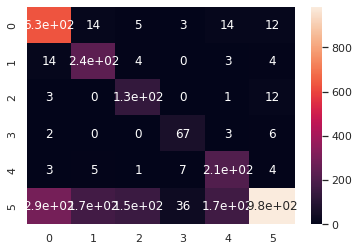

In [ ]:

sns.heatmap(confusion_matrix(xgb_pred, y_val), annot=True)
plt.show()

In [ ]:
print(classification_report(y_val, xgb_pred))

              precision    recall  f1-score   support

           0       0.93      0.67      0.78       946
           1       0.90      0.56      0.69       427
           2       0.89      0.45      0.60       296
           3       0.86      0.59      0.70       113
           4       0.91      0.52      0.67       397
           5       0.54      0.96      0.70      1021

    accuracy                           0.71      3200
   macro avg       0.84      0.63      0.69      3200
weighted avg       0.80      0.71      0.71      3200



#application

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


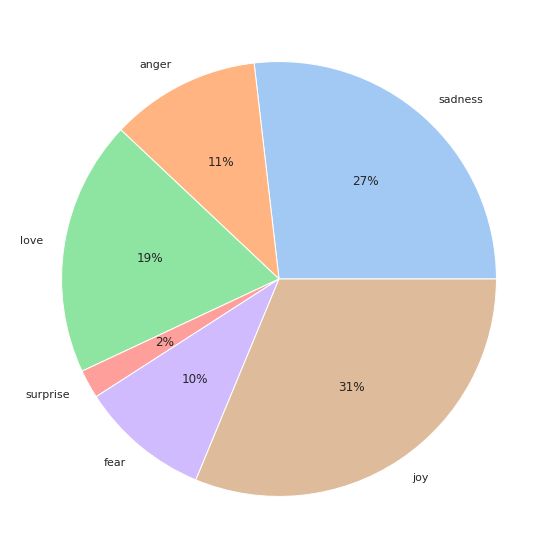

In [ ]:
input = ['i fell like i am loved by my parents']
input = pre(pd.DataFrame(input, columns=['Comment'])).lemma_str
vect = vectorizer.transform(input)
foo = xgb_model.predict_proba(vect)
colors = sns.color_palette('pastel')[0:6]

#create pie chart
plt.figure(figsize=(20,10))
plt.pie(foo, labels = emo_list, colors = colors, autopct='%.0f%%')
plt.show()